In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import ceil

In [ ]:
for filename in ['nfcapd.202012301340.txt',
                 'nfcapd.202012301345.txt',
                 'nfcapd.202012301350.txt',
                 'nfcapd.202012301355.txt']:
                 with open(filename) as f:
                   lines = f.readlines()
                 
                 with open(filename, 'w') as f:
                   f.writelines(lines[1:-4])

# 1 (угловой коэффициент по малому числу измерений)

In [ ]:
xl = pd.ExcelFile('Zaprosy_Po_Portam.xlsx')

xl.sheet_names

['июнь 2018', 'Зипф - данные', 'TCP', 'UDP', 'Other', 'UDP not used ports']

In [ ]:
tcp_sheet = xl.parse('TCP')
udp_sheet = xl.parse('UDP')
udp_sheet

,Port,Flows,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,5060,280161,1,NaN,0.000000,5.447408
1,137,45550,2,NaN,0.301030,4.658488
2,111,4509,3,NaN,0.477121,3.654080
3,523,2397,4,NaN,0.602060,3.379668
4,0,2262,5,NaN,0.698970,3.354493
...,...,...,...,...,...,...
16738,44402,1,16739,NaN,4.223730,0.000000
16739,31362,1,16740,NaN,4.223755,0.000000
16740,7798,1,16741,NaN,4.223781,0.000000
16741,62514,1,16742,NaN,4.223807,0.000000


In [ ]:
tcp = np.log10(tcp_sheet.Flows)
udp = np.log10(udp_sheet.Flows)
udp

0        5.447408
1        4.658488
2        3.654080
3        3.379668
4        3.354493
           ...   
16738    0.000000
16739    0.000000
16740    0.000000
16741    0.000000
16742    0.000000
Name: Flows, Length: 16743, dtype: float64

In [ ]:
udp_flows = np.empty(0, dtype=int)
for ind, count in enumerate(udp_sheet.Flows):
  udp_flows = np.concatenate((udp_flows, ind * np.ones(count)))
  

def get_sample_udp(size):
  np.random.shuffle(udp_flows)
  sample = udp_flows[:ceil(len(udp_flows) * size)]
  return np.log10(pd.Series(sample).value_counts())

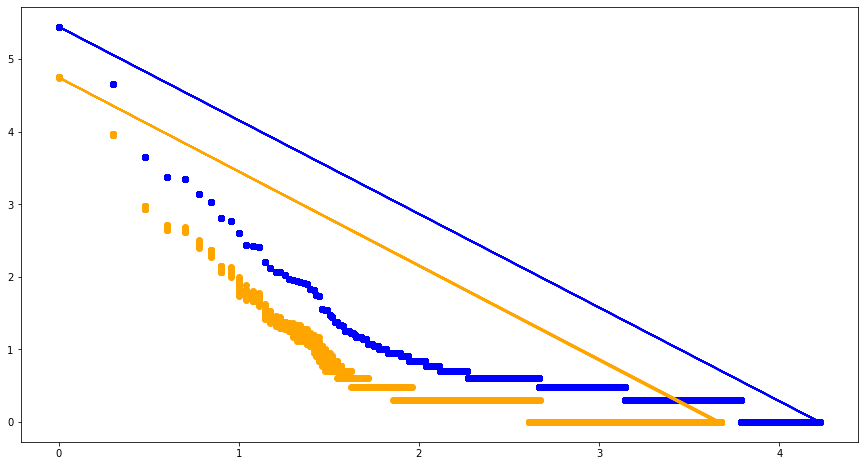

In [ ]:
plt.figure(figsize=(15,8))
coefs = []
for i in range(50):
  mini_udp = get_sample_udp(0.2)

  plt.scatter(np.log10(np.arange(1, len(udp)+1)), udp, c='blue')
  plt.scatter(np.log10(np.arange(1, len(mini_udp)+1)), mini_udp, c='orange')

  k, b = np.polyfit(np.log10([1, len(udp)+1]), (udp.iloc[0], udp.iloc[-1]), 1)
  plt.plot(np.linspace(0, np.log10(len(udp)+1)),
          k * np.linspace(0, np.log10(len(udp)+1)) + b,
          c='blue')
  coefs.append(k)

  k, b = np.polyfit(np.log10([1, len(mini_udp)+1]), (mini_udp.iloc[0], mini_udp.iloc[-1]), 1)
  plt.plot(np.linspace(0, np.log10(len(mini_udp)+1)),
          k * np.linspace(0, np.log10(len(mini_udp)+1)) + b,
          c='orange')
  coefs.append(k)

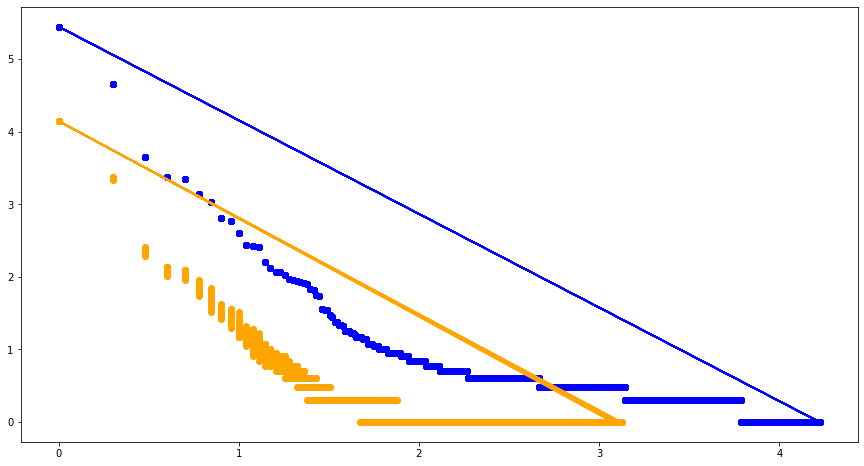

In [ ]:
plt.figure(figsize=(15,8))
coefs = []
for i in range(50):
  mini_udp = get_sample_udp(0.05)

  plt.scatter(np.log10(np.arange(1, len(udp)+1)), udp, c='blue')
  plt.scatter(np.log10(np.arange(1, len(mini_udp)+1)), mini_udp, c='orange')

  k, b = np.polyfit(np.log10([1, len(udp)+1]), (udp.iloc[0], udp.iloc[-1]), 1)
  plt.plot(np.linspace(0, np.log10(len(udp)+1)),
          k * np.linspace(0, np.log10(len(udp)+1)) + b,
          c='blue')
  coefs.append(k)

  k, b = np.polyfit(np.log10([1, len(mini_udp)+1]), (mini_udp.iloc[0], mini_udp.iloc[-1]), 1)
  plt.plot(np.linspace(0, np.log10(len(mini_udp)+1)),
          k * np.linspace(0, np.log10(len(mini_udp)+1)) + b,
          c='orange')
  coefs.append(k)

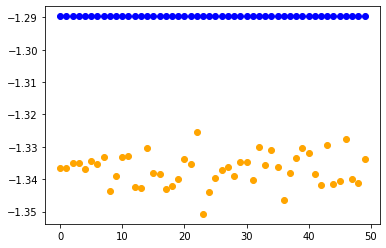

In [ ]:
plt.scatter(np.arange(len(coefs)/2), coefs[::2], c='blue')
plt.scatter(np.arange(len(coefs)/2), coefs[1::2], c='orange')

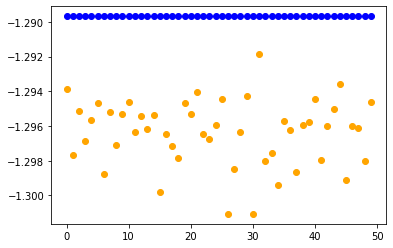

In [ ]:
plt.scatter(np.arange(len(coefs)/2), coefs[::2], c='blue')
plt.scatter(np.arange(len(coefs)/2), coefs[1::2], c='orange')

In [ ]:
tcp_flows = np.empty(0, dtype=int)
for ind, count in enumerate(tcp_sheet.Flows):
  tcp_flows = np.concatenate((tcp_flows, ind * np.ones(count)))

def get_sample_tcp(size):
  np.random.shuffle(tcp_flows)
  sample = tcp_flows[:ceil(len(tcp_flows) * size)]
  sample = np.log10(pd.Series(sample).value_counts())
  return sample[sample!=0]

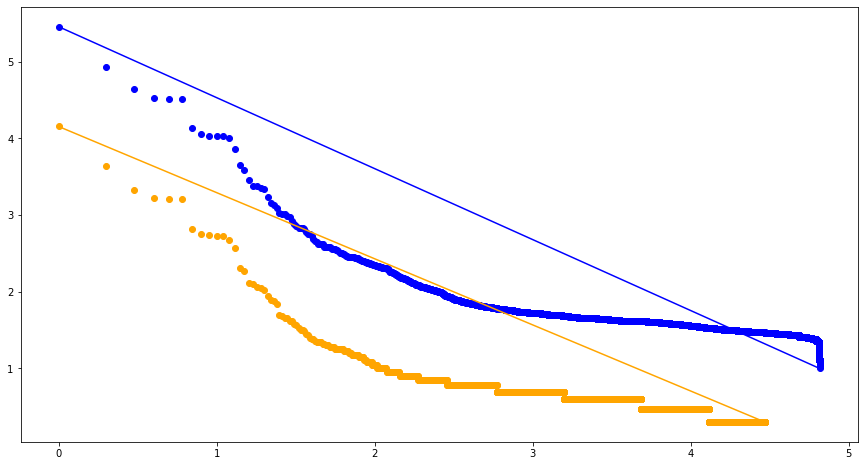

In [ ]:
plt.figure(figsize=(15,8))
coefs = []
for i in range(1):
  mini_tcp = get_sample_tcp(0.05)

  plt.scatter(np.log10(np.arange(1, len(tcp)+1)), tcp, c='blue')
  plt.scatter(np.log10(np.arange(1, len(mini_tcp)+1)), mini_tcp, c='orange')

  k, b = np.polyfit(np.log10([1, len(tcp)+1]), (tcp.iloc[0], tcp.iloc[-1]), 1)
  plt.plot(np.linspace(0, np.log10(len(tcp)+1)),
          k * np.linspace(0, np.log10(len(tcp)+1)) + b,
          c='blue')
  coefs.append(k)

  k, b = np.polyfit(np.log10([1, len(mini_tcp)+1]), (mini_tcp.iloc[0], mini_tcp.iloc[-1]), 1)
  plt.plot(np.linspace(0, np.log10(len(mini_tcp)+1)),
          k * np.linspace(0, np.log10(len(mini_tcp)+1)) + b,
          c='orange')
  coefs.append(k)

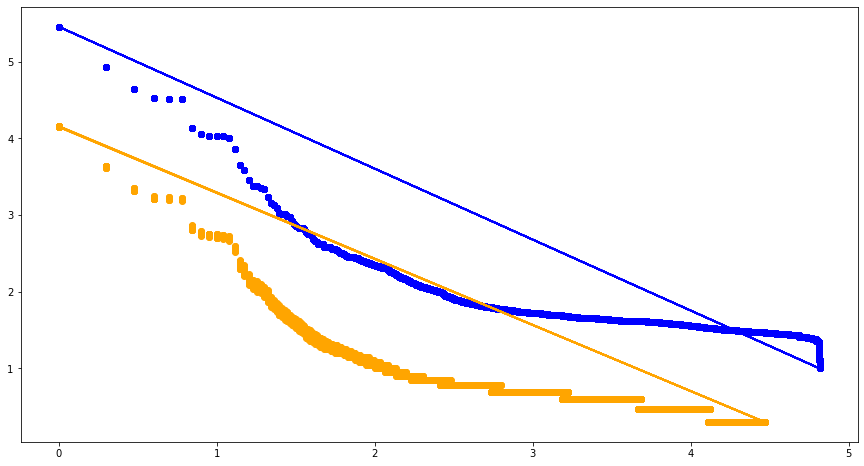

In [ ]:
plt.figure(figsize=(15,8))
coefs = []
for i in range(50):
  mini_tcp = get_sample_tcp(0.05)

  plt.scatter(np.log10(np.arange(1, len(tcp)+1)), tcp, c='blue')
  plt.scatter(np.log10(np.arange(1, len(mini_tcp)+1)), mini_tcp, c='orange')

  k, b = np.polyfit(np.log10([1, len(tcp)+1]), (tcp.iloc[0], tcp.iloc[-1]), 1)
  plt.plot(np.linspace(0, np.log10(len(tcp)+1)),
          k * np.linspace(0, np.log10(len(tcp)+1)) + b,
          c='blue')
  coefs.append(k)

  k, b = np.polyfit(np.log10([1, len(mini_tcp)+1]), (mini_tcp.iloc[0], mini_tcp.iloc[-1]), 1)
  plt.plot(np.linspace(0, np.log10(len(mini_tcp)+1)),
          k * np.linspace(0, np.log10(len(mini_tcp)+1)) + b,
          c='orange')
  coefs.append(k)

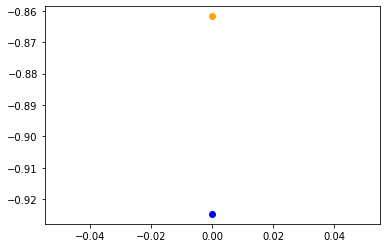

In [ ]:
plt.scatter(np.arange(len(coefs)/2), coefs[::2], c='blue')
plt.scatter(np.arange(len(coefs)/2), coefs[1::2], c='orange')

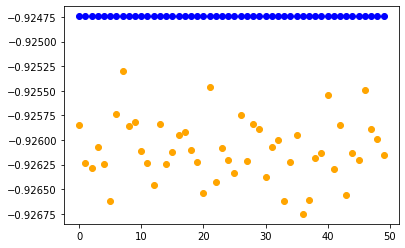

In [ ]:
plt.scatter(np.arange(len(coefs)/2), coefs[::2], c='blue')
plt.scatter(np.arange(len(coefs)/2), coefs[1::2], c='orange')

# 2 (на какие порты прилетает трафик)

In [ ]:
tcp_flows = []
udp_flows = []

for filename in ['nfcapd.202012301340.txt',
                 'nfcapd.202012301345.txt',
                 'nfcapd.202012301350.txt',
                 'nfcapd.202012301355.txt']:
  with open(filename) as file:
    file.readline()
    c = 0
    for line in file:
      if line[40:43] == 'TCP':
        tcp_flows.append(int(line[89:88+line[88:].find(' ')]))
      elif line[40:43] == 'UDP':
        udp_flows.append(int(line[89:88+line[88:].find(' ')]))

In [ ]:
t = np.zeros(65536)
for flow in udp_flows:
  t[flow] += 1
udp = np.log10(sorted(t[t!=0], reverse=True))

plt.figure(figsize=(15,8))
plt.scatter(np.log10(np.arange(1, len(udp)+1)), udp, c='blue')
plt.show()

In [ ]:
t = np.zeros(65536)
for flow in tcp_flows:
  t[flow] += 1
tcp = np.log10(sorted(t[t!=0], reverse=True))

plt.figure(figsize=(15,8))
plt.scatter(np.log10(np.arange(1, len(tcp)+1)), tcp, c='blue')
plt.show()

# 3 (число активных потоков)

In [ ]:
ip_count = {}

for filename in ['nfcapd.202012301340.txt',
                 'nfcapd.202012301345.txt',
                 'nfcapd.202012301350.txt',
                 'nfcapd.202012301355.txt']:
  with open(filename) as f:
    for line in f:
      line = line.split()
      ip = line[5]
      ip = ip[:ip.index(':')]
      ip_count[ip] = ip_count.get(ip, 0) + 1

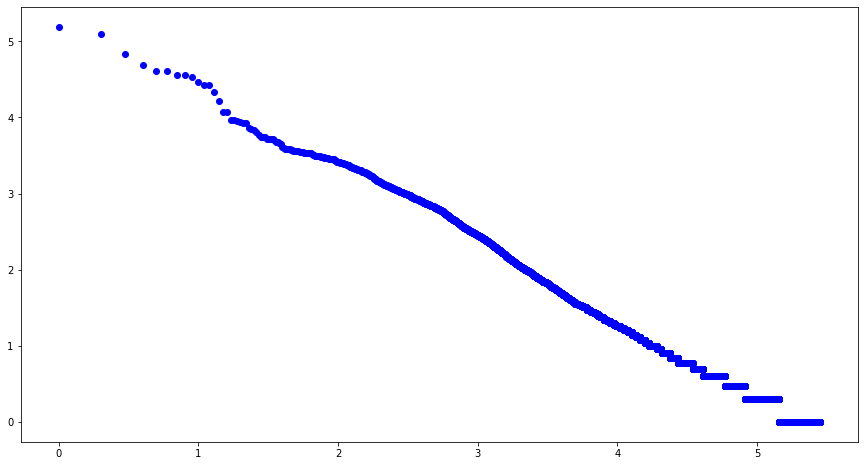

In [ ]:
y = np.log10(sorted(list(ip_count.values()), reverse=True))

plt.figure(figsize=(15,8))
plt.scatter(np.log10(np.arange(1, len(y)+1)), y, c='blue')

# 4 (udp tcp трафик от входящих айпи адресов)

In [ ]:
udp_traffic = {}
tcp_traffic = {}

for filename in ['nfcapd.202012301340.txt',
                 'nfcapd.202012301345.txt',
                 'nfcapd.202012301350.txt',
                 'nfcapd.202012301355.txt']:
  with open(filename) as f:
    for line in f:
      line = line.split()
      ip = line[5]
      ip = ip[:ip.index(':')]
      isUDP = line[4] == 'UDP'
      isTCP = line[4] == 'TCP'
      if isUDP + isTCP == True:
        try:
          ibyte = int(line[-2])
        except:
          if line[-2] == 'M':
            ibyte = int(float(line[-3]) * 1000 * 1000)
          else:
            raise Exception
        
        container = udp_traffic if isUDP else tcp_traffic
        container[ip] =  container.get(ip, 0) + ibyte

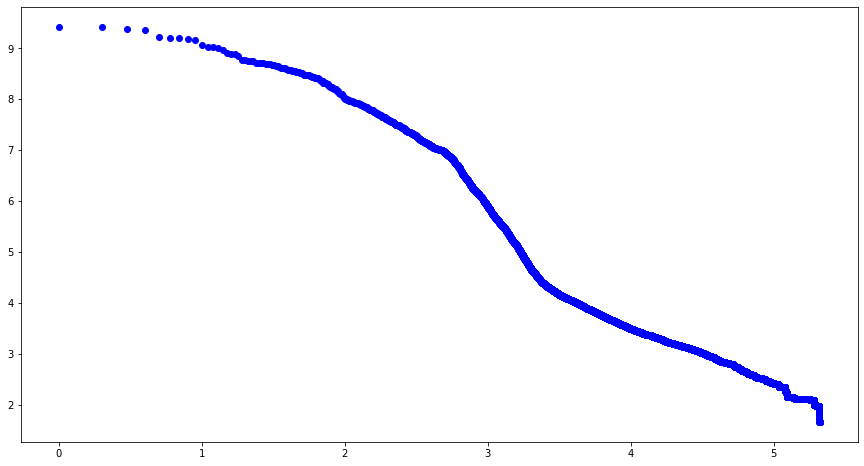

In [ ]:
y = np.log10(sorted(list(udp_traffic.values()), reverse=True))

plt.figure(figsize=(15,8))
plt.scatter(np.log10(np.arange(1, len(y)+1)), y, c='blue')

In [ ]:
y = np.log10(sorted(list(tcp_traffic.values()), reverse=True))

plt.figure(figsize=(15,8))
plt.scatter(np.log10(np.arange(1, len(y)+1)), y, c='blue')

### test

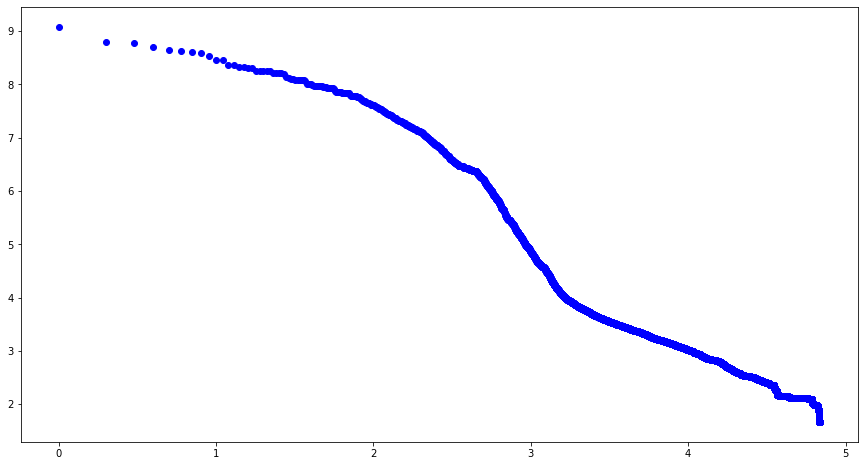

[1214400000, 629188121, 600297648, 507577040, 443399360]


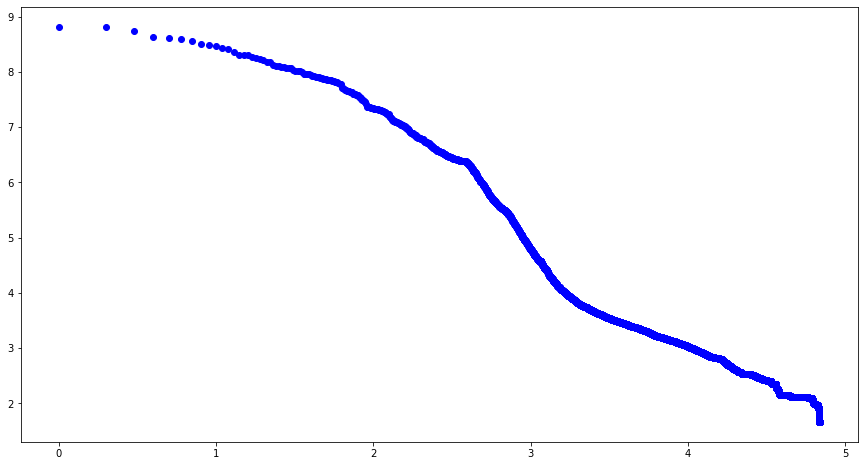

[660262582, 654430405, 543513279, 433736154, 419700000]


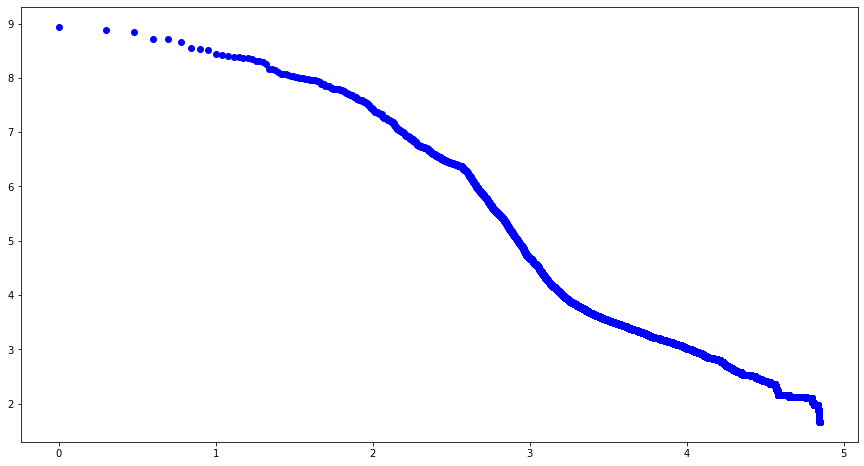

[873800000, 748402355, 693863918, 516813492, 515553469]


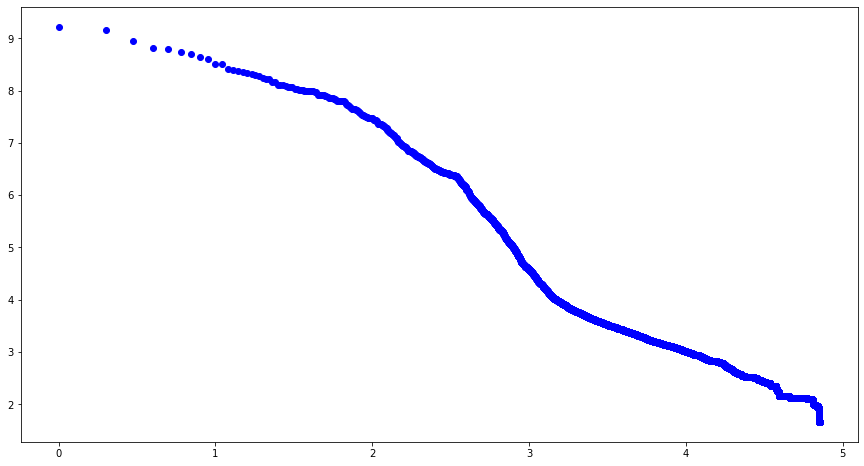

[1664700000, 1417199999, 891253128, 639625095, 612293728]


In [ ]:
for filename in ['nfcapd.202012301340.txt',
                 'nfcapd.202012301345.txt',
                 'nfcapd.202012301350.txt',
                 'nfcapd.202012301355.txt']:
  udp_traffic = {}
  tcp_traffic = {}
  
  with open(filename) as f:
    for line in f:
      line = line.split()
      ip = line[5]
      ip = ip[:ip.index(':')]
      isUDP = line[4] == 'UDP'
      isTCP = line[4] == 'TCP'
      if isUDP + isTCP == True:
        try:
          ibyte = int(line[-2])
        except:
          if line[-2] == 'M':
            ibyte = int(float(line[-3]) * 1000 * 1000)
          else:
            raise Exception
        
        container = udp_traffic if isUDP else tcp_traffic
        container[ip] =  container.get(ip, 0) + ibyte
    
    y = np.log10(sorted(list(udp_traffic.values()), reverse=True))

    plt.figure(figsize=(15,8))
    plt.scatter(np.log10(np.arange(1, len(y)+1)), y, c='blue')
    plt.show()
    print(sorted(list(udp_traffic.values()), reverse=True)[:5])

In [ ]:
plt.figure(figsize=(15,15)).add_subplot(111,aspect=1)
x = np.linspace(0.01, 10, 1000)
plt.scatter(np.log10(x), np.log10(1/x**3))

In [ ]:
np.log10(1/x**2).max()

In [ ]:
x={1:5,3:-88, 2: 90}
max(x, key=x.get)

2

In [ ]:
x

{1: 5, 2: 90, 3: 88}